<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/11_Multimodal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data (time series - Labels - maps)
HCP_hp2000       TR=0.7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.system('cp drive/My\ Drive/COLOR-HCP_hp2000.zip HCP_hp2000.zip')
os.system('unzip HCP_hp2000.zip')

0

In [3]:
os.system('wget -nc https://www.dropbox.com/s/n9zq7srft09ef76/main_features.py?dl=1')  
os.system('mv main_features.py?dl=1 main_features.py')
os.system('wget -nc https://www.dropbox.com/s/m432eescwggki6t/model1.py?dl=1')
os.system('mv model1.py?dl=1 model1.py')

0

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import glob
import main_features as mf
import model1 as mod
from sklearn.preprocessing import StandardScaler
import cv2
import os
import sys
import random
import warnings
import pandas as pd
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation
print (tf.__version__)

Using TensorFlow backend.


1.15.0


In [0]:
series = scipy.io.loadmat('HCP_hp2000/Data.mat')
labels = scipy.io.loadmat('HCP_hp2000/Labels.mat')
order = scipy.io.loadmat('HCP_hp2000/Order.mat')

In [0]:
Data=series[list(series.keys())[-1]]
Labe=labels[list(labels.keys())[-1]]
Orde= order[list(order.keys())[-1]]

Data=np.transpose(Data)
Labe=np.array(np.transpose(Labe)[:,0], np.dtype('int'))
TR=0.7

In [7]:
print('Components and time points', np.shape(Data))
print('Labels of componets       ', np.shape(Labe))
print('Order of brain maps       ', np.shape(Orde))

Components and time points (22877, 1200)
Labels of componets        (22877,)
Order of brain maps        (22877,)


In [8]:
#percentage
per=int(np.shape(Data)[0]*0.8)

X_test=Data[per:]
X_train=Data[:per]
y_test=Labe[per:]
y_train=Labe[:per]
TEST_PATH=Orde[per:]
TRAIN_PATH=Orde[:per]

print('training data   ', X_train.shape)
print('test data       ', X_test.shape)

print('training labels ', y_train.shape)
print('test labels     ', y_test.shape)

print('training maps   ', TRAIN_PATH.shape)
print('test maps       ', TEST_PATH.shape)

training data    (18301, 1200)
test data        (4576, 1200)
training labels  (18301,)
test labels      (4576,)
training maps    (18301,)
test maps        (4576,)


In [9]:
mod.downloadH5()
network=mod.get_model()
scaler = StandardScaler()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                91        
_________________________________________________________________
activation_1 (Activation)    (None, 13)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 84        
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_

In [10]:
points=np.shape(Data)[1]
metrics=mf.Metrics6(np.transpose(Data), TR, points)
X_testN = scaler.fit_transform(np.transpose(metrics))
preds = network.predict_classes(X_testN, verbose=0)
AccuracyR = np.mean(preds == (Labe))
print('\033[94mPrecision = ', AccuracyR*100, '%')

met=np.transpose(metrics)
x_test=met[per:]
x_train=met[:per]

Calculating Amplitude of Low Frequency Fluctuations (ALFF) for slow 4  ...
Calculating Fractional Amplitude of Low Frequency Fluctuations (fALFF) for slow 4  ...
Calculating Amplitude of Low Frequency Fluctuations (ALFF) for slow 5  ...
Calculating Fractional Amplitude of Low Frequency Fluctuations (fALFF) for slow 5  ...
Calculating Jump function 1...
Calculating Variance of central frequency...

Order of metrics
 fALFF slow 4,
 ALFF slow 4,
 vcf,
 ALFF slow 5,
 jump and
 fALFF slow 5 
Precision =  97.4384753245618 %


# CNN

In [11]:
print('Components and time points', np.shape(Data))
print('Labels of componets       ', np.shape(Labe))
print('Order of brain maps       ', np.shape(Orde))
print('Metrics per component     ', np.shape(metrics))

Components and time points (22877, 1200)
Labels of componets        (22877,)
Order of brain maps        (22877,)
Metrics per component      (6, 22877)


In [0]:
# images parameters
IMG_WIDTH = 109
IMG_HEIGHT = 91
IMG_CHANNELS = 3
nb_classes=2

In [0]:
Signal=np.array(np.where(Labe==1))[0]

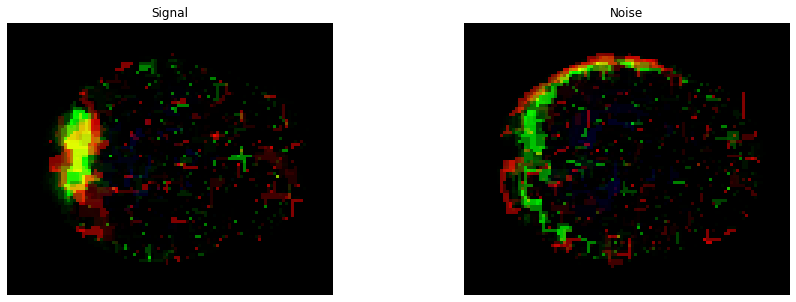

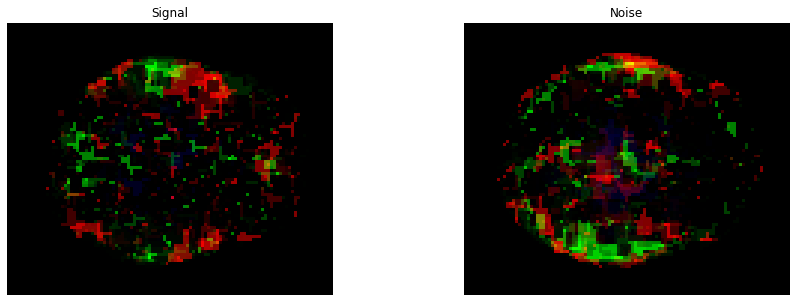

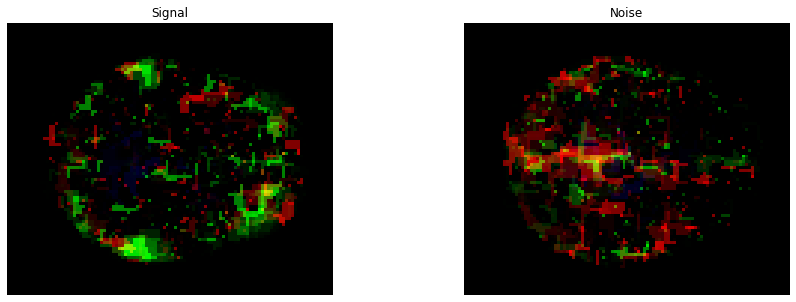

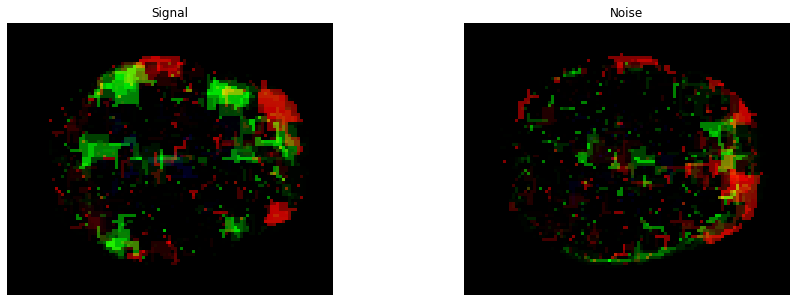

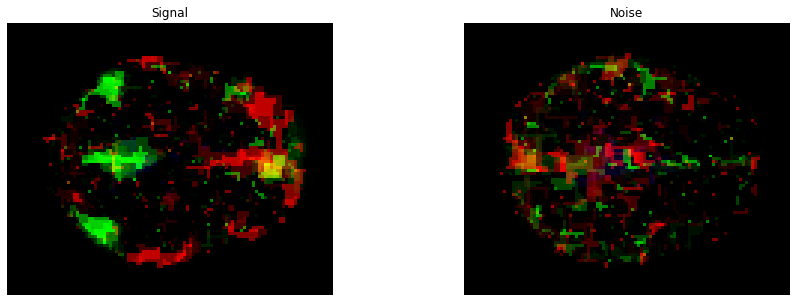

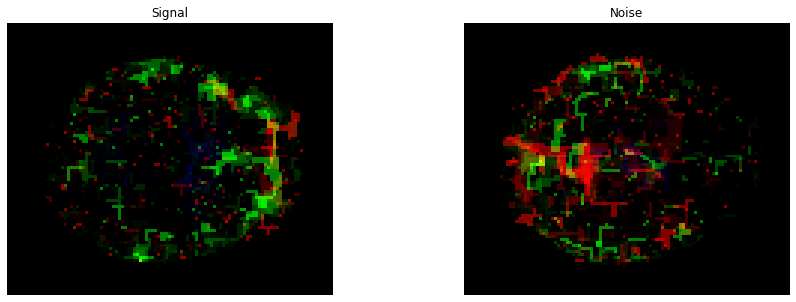

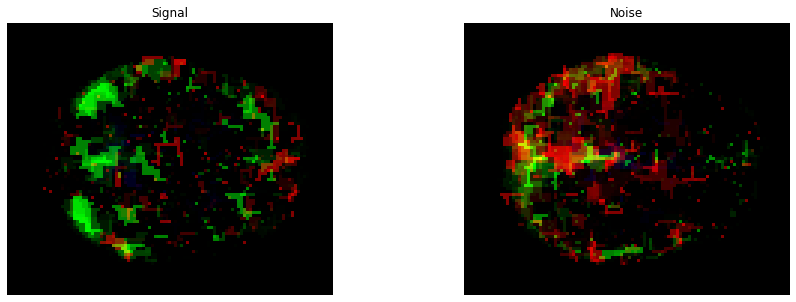

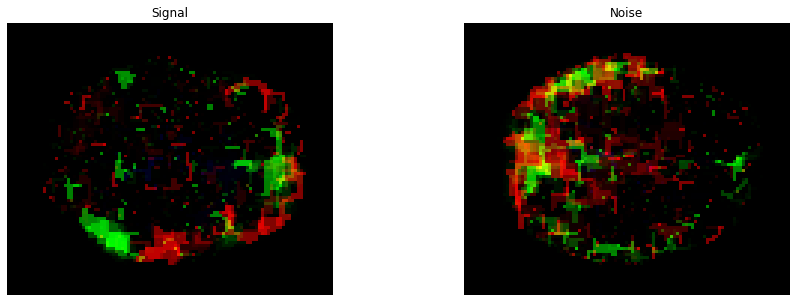

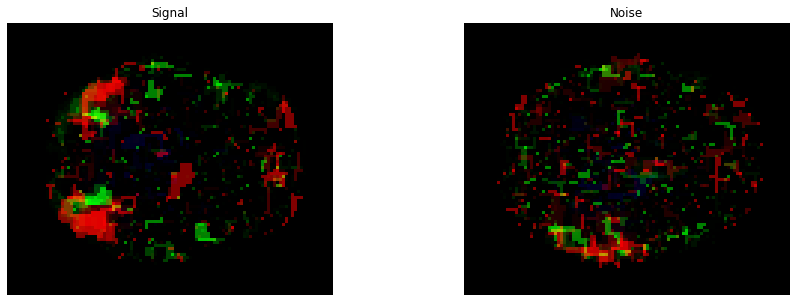

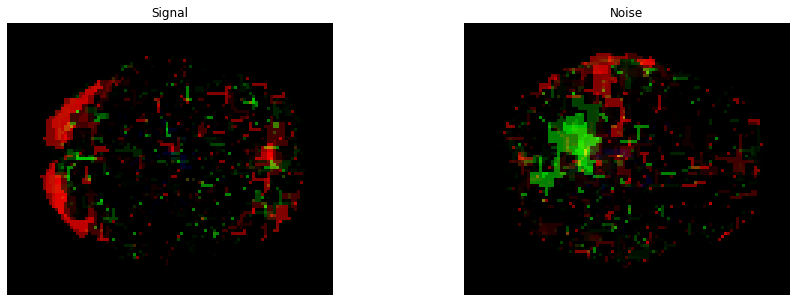

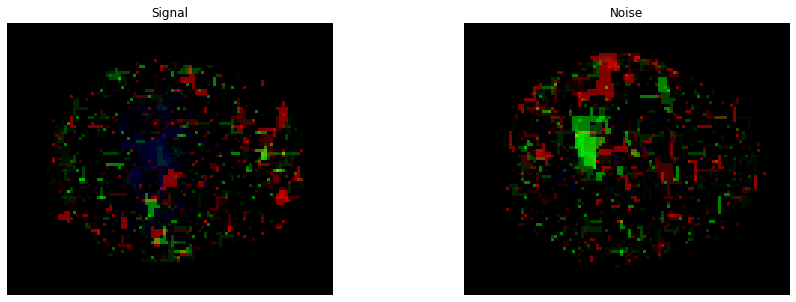

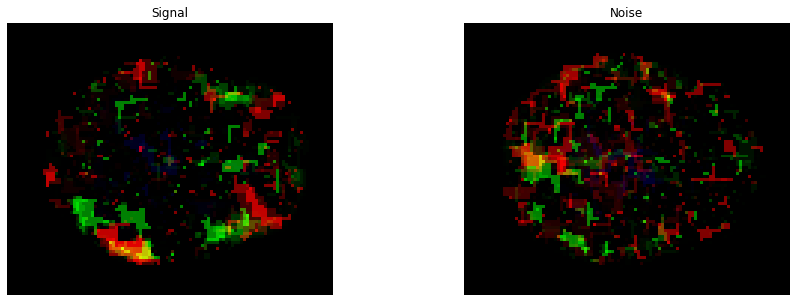

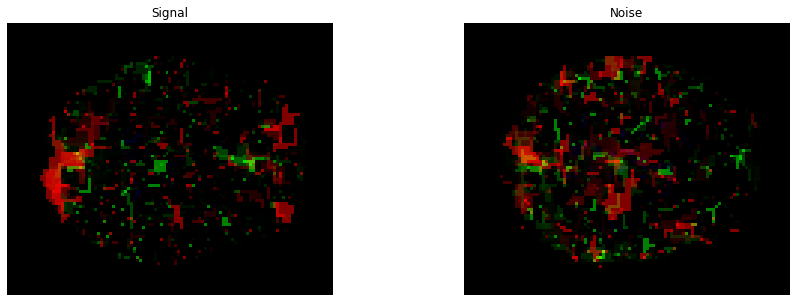

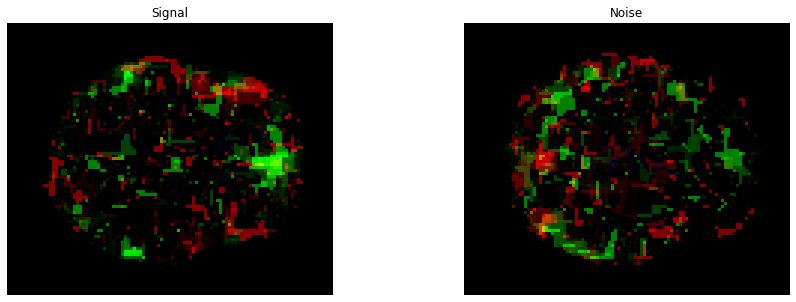

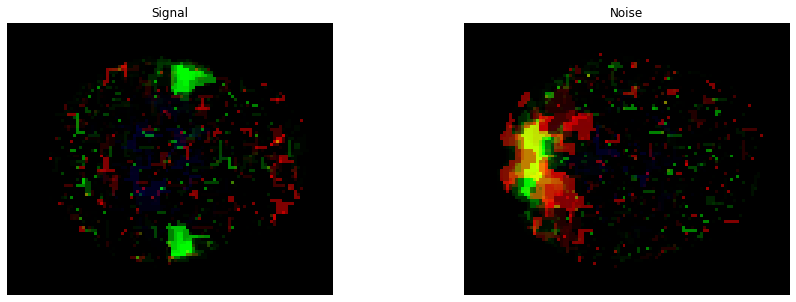

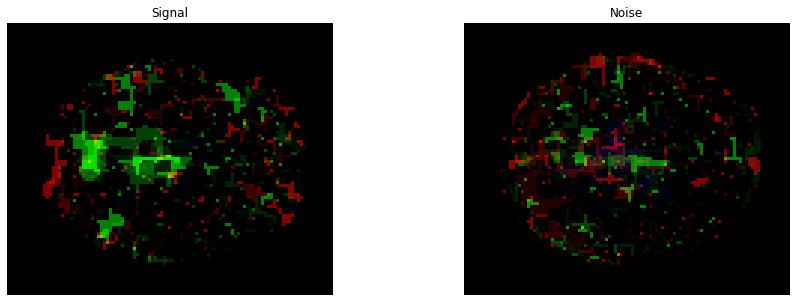

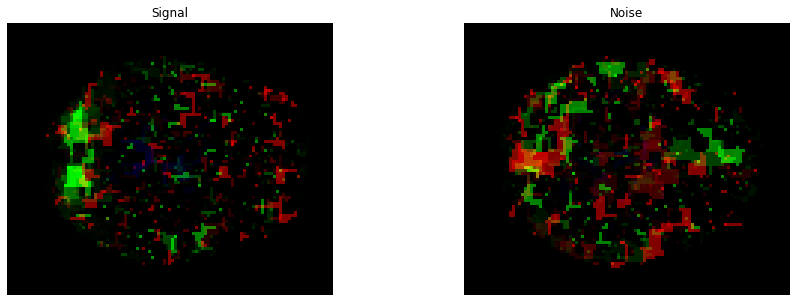

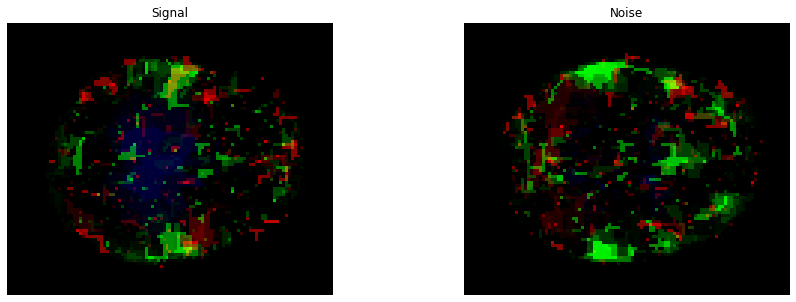

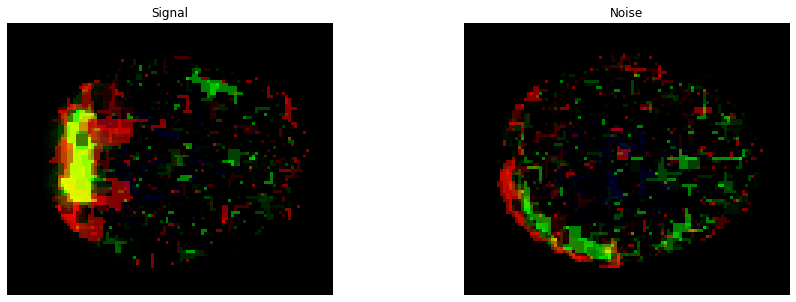

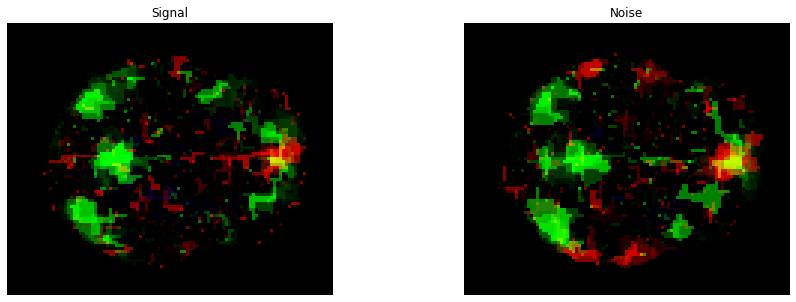

In [14]:
for j in range(20):
  ima1=cv2.imread(Orde[Signal[20+j]].strip())
  ima2=cv2.imread(Orde[20+j].strip())

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.imshow(ima1)
  plt.title('Signal')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(ima2)
  plt.title('Noise')
  plt.axis('off')

In [0]:
M_train = np.zeros((len(TRAIN_PATH), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
for n in range(len(TRAIN_PATH)):
  name=TRAIN_PATH[n].strip()
  ima=cv2.imread(name)
  ima=cv2.medianBlur(ima, 7)
  ima=np.array(ima)
  M_train[n]=ima

In [0]:
M_test = np.zeros((len(TEST_PATH), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
for n in range(len(TEST_PATH)):
  name=TEST_PATH[n].strip()
  ima=cv2.imread(name)
  ima=cv2.medianBlur(ima, 7)
  ima=np.array(ima)
  M_test[n]=ima

In [17]:
print('training data   ', x_train.shape)
print('test data       ', x_test.shape)

print('training labels ', y_train.shape)
print('test labels     ', y_test.shape)

print('training maps   ', M_train.shape)
print('test maps       ', M_test.shape)

training data    (18301, 6)
test data        (4576, 6)
training labels  (18301,)
test labels      (4576,)
training maps    (18301, 91, 109, 3)
test maps        (4576, 91, 109, 3)


In [18]:
reg=0.4
extra_info_dim=np.shape(x_train)[1]
print(extra_info_dim)

6


In [0]:
#funcion para establecer el modelo
def get_model():
    tf.reset_default_graph()
    tf.keras.backend.clear_session()    
    
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)) #Capa de entrada
    s = Lambda(lambda x: x / 255) (inputs)                #Capa no entrenable o funcion (normaliza las ima)

    c1 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(reg) (c1)  
    c1 = MaxPooling2D((2, 2)) (c1)                                              
    
    c1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    c1 = Dropout(reg) (c1) 
    c1 = MaxPooling2D((2, 2)) (c1)

    c1 = Conv2D(8, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    c1 = Dropout(reg) (c1) 
    c1 = MaxPooling2D((2, 2)) (c1)                                                                
    
    #Flatten layers
    c2 = Flatten()(c1)    
        
    c2 = Dense(64, activation='relu')(c2)
    c2 = Dropout(reg)(c2)

    c2 = Dense(16, activation='relu')(c2)
    c2 = Dropout(reg)(c2)    

    #Concatenate layers
    inp2 = Input((extra_info_dim))
    con = concatenate([c2, inp2])

    c6 = Dense(11, activation='relu')(con)
    c6 = Dropout(reg)(c6)

    c6 = Dense(4, activation='relu')(c6)
    c6 = Dropout(reg)(c6)    
       
    outputs = Dense(nb_classes, activation='softmax')(c6)

    model = Model(inputs=[inputs, inp2], outputs=[outputs])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])    
    return model

In [31]:
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 91, 109, 3)] 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 91, 109, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 91, 109, 64)  1792        lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 91, 109, 64)  0           conv2d[0][0]                     
______________________________________________________________________________________________

In [33]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('drive/My Drive/MultimodalfMRI.h5', verbose=1, save_best_only=True)
results = model.fit([M_train, x_train], y_train, validation_split=0.1, batch_size=16, epochs=50, callbacks=[earlystopper, checkpointer])

Train on 16470 samples, validate on 1831 samples
Epoch 1/50
16448/16470 [============================>.] - ETA: 0s - loss: 0.1791 - acc: 0.9199
Epoch 00001: val_loss improved from inf to 0.10641, saving model to drive/My Drive/MultimodalfMRI.h5
16470/16470 [==============================] - 27s 2ms/sample - loss: 0.1791 - acc: 0.9199 - val_loss: 0.1064 - val_acc: 0.9514
Epoch 2/50
16432/16470 [============================>.] - ETA: 0s - loss: 0.1511 - acc: 0.9326
Epoch 00002: val_loss did not improve from 0.10641
16470/16470 [==============================] - 26s 2ms/sample - loss: 0.1509 - acc: 0.9327 - val_loss: 0.1093 - val_acc: 0.9448
Epoch 3/50
16432/16470 [============================>.] - ETA: 0s - loss: 0.1349 - acc: 0.9384
Epoch 00003: val_loss improved from 0.10641 to 0.08783, saving model to drive/My Drive/MultimodalfMRI.h5
16470/16470 [==============================] - 27s 2ms/sample - loss: 0.1347 - acc: 0.9386 - val_loss: 0.0878 - val_acc: 0.9629
Epoch 4/50
16448/16470 [=

In [37]:
test_preds = model.predict([M_test, x_test])
test_predsF=test_preds.argmax(axis=1)
Accuracy = np.mean(test_predsF == y_test)
print(Accuracy)

0.975743006993007


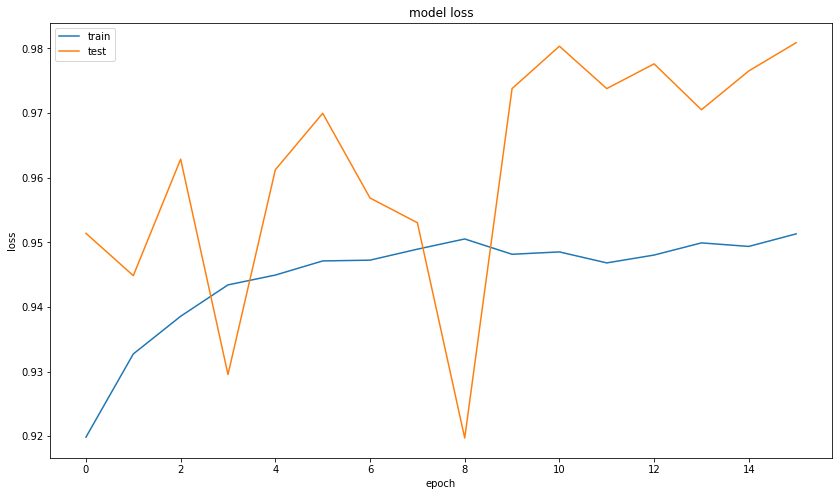

In [35]:
#%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()